# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [244]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [245]:
def max_element(x):
    zeros = x==0
    if len(zeros) != 0:
        return max(x[1:][zeros[:-1]])
    else:
        return None
    
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) #из задания
print(x)
print(max_element(x)) 

[6 2 0 3 0 0 5 7 0]
5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [246]:
def nearest_value(X, v):
    onedim_matrix = X.flatten()  # преобразуем матрицу в одномерный массив
    diff = np.abs(onedim_matrix - v)  # находим  разницу между элементами и числом
    min_diff_index = np.argmin(diff)  # находим индекс элемента с минимальной разницей
    answer = onedim_matrix[min_diff_index]  # получаем ближайший элемент
    return answer

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(X)
print('Близжайший элемент:', nearest_value(X, v))

[[0 1 2 3 4]
 [5 6 7 8 9]]
Близжайший элемент: 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [247]:
def scale(X):
    mean = np.mean(X, axis=0)  # вычисляем выборочное среднее для каждого столбца
    std = np.std(X, axis=0)  # вычисляем стандартное отклонение для каждого столбца
    std[std == 0] = 1  # проверяем <>0
    scaled = (X - mean) / std  
    return scaled


X = np.random.randint(0, 10, size=(3, 5))
print("Исходная матрица:")
print(X)
print(' ')
print("Масштабированная матрица:")
print(scale(X))

Исходная матрица:
[[4 9 5 0 9]
 [0 5 4 2 9]
 [0 5 4 2 3]]
 
Масштабированная матрица:
[[ 1.41421356  1.41421356  1.41421356 -1.41421356  0.70710678]
 [-0.70710678 -0.70710678 -0.70710678  0.70710678  0.70710678]
 [-0.70710678 -0.70710678 -0.70710678  0.70710678 -1.41421356]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [248]:
def get_stats(X):
    det = np.linalg.det(X) 
    trace = np.trace(X)  
    min_element = np.min(X)  
    max_element = np.max(X)  
    frob_norm = np.linalg.norm(X)  
    val = np.linalg.eigvals(X) 
    inverse_matrix = np.linalg.inv(X)  
    
    return det, trace, min_element, max_element, frob_norm, val, inverse_matrix

X = np.random.normal(10, 1, size=(5, 5))
print("Исходная матрица:")
print(X)
print(' ')
get_stats(X)
print("Определитель:", det)
print(' ')
print("След:", trace)
print(' ')
print("Наименьший элемент:", min_element)
print(' ')
print("Наибольший элемент:", max_element)
print(' ')
print("Норма Фробениуса:", frob_norm)
print(' ')
print("Собственные числа:", val)
print(' ')
print("Обратная матрица:")
print(' ')
print(inverse_matrix)

Исходная матрица:
[[12.85749605 10.02507737 10.02629463 10.92082967 10.3569626 ]
 [10.62987341 10.30615809  9.55921572  9.81614156 11.15786298]
 [ 9.58026748  9.71857818  9.73866849  9.5110151   9.38680735]
 [ 9.39225719 10.29062204  9.64289988  9.222829    9.759143  ]
 [ 8.40528882 10.71028414  9.96371992 10.440119   10.22902347]]
 
Определитель: 328.3420742095787
 
След: 53.234606544726375
 
Наименьший элемент: 8.425176247699431
 
Наибольший элемент: <function max_element at 0x000002C6E2471A80>
 
Норма Фробениуса: 51.725081181941
 
Собственные числа: [51.40296514+0.j         -0.35247919+1.89125682j -0.35247919-1.89125682j
  1.26829989+0.34247056j  1.26829989-0.34247056j]
 
Обратная матрица:
 
[[ 9.77464981e-01 -1.36831152e-01 -1.21339376e-01 -8.48174496e-01
   1.16715575e-01]
 [-1.32539055e-01  7.04560798e-03 -2.04959057e-01 -4.12244368e-04
   3.39005585e-01]
 [-2.50802667e-01  3.64150291e-01  1.98299855e-01  2.87681048e-02
  -3.14972198e-01]
 [ 7.96430038e-02 -1.40879688e-01 -3.0308

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [249]:
max_elements = []
for _ in range(100):
    X = np.random.normal(0, 1, size=(10, 10))
    Y = np.random.normal(0, 1, size=(10, 10))
    Z = np.dot(X, Y)
    max_elem = np.max(Z)
    max_elements.append(max_elem)

mean_max = np.mean(max_elements)
quantile_95 = np.percentile(max_elements, 95)

print("Среднее значение максимальных элементов:", mean_max)
print("95-процентная квантиль:", quantile_95)

Среднее значение максимальных элементов: 8.385284258620102
95-процентная квантиль: 11.807714380009664


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [250]:
import pandas as pd
%matplotlib inline

In [251]:
data = pd.read_csv('2008.csv')
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [252]:
data.groupby(by='CancellationCode').size()

CancellationCode
A    563
B    549
C    299
dtype: int64

Самая частая причина отмены рейса: перевозчик (A = carrier)

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [253]:
mean_distance =  data['Distance'].mean()
print('Средняя дистанция: ', mean_distance, 'miles')
maxi_distance =  data['Distance'].max()
print('Максимальная дистанция: ', maxi_distance, 'miles')
mini_distance =  data['Distance'].min()
print('Минимальная дистанция: ', mini_distance, 'miles')

Средняя дистанция:  724.5082571428571 miles
Максимальная дистанция:  4962 miles
Минимальная дистанция:  31 miles


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [254]:
mini_data = data.loc[data['Distance'] == 31]
mini_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0
48112,2008,2,28,4,1535.0,1537,1603.0,1605,AS,64,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


30.12.2008, понедельник: рейс №17349
26.12.2008, вторник: рейс №1116
18.08.2008, вторник: рейс №27534 
11.03.2008, четверг: рейс №48112
09.08.2008, пятница: рейс №6958
28.02.2008, суббота: рейс №46082

In [255]:
list_ = [1116, 6958, 17349, 27534, 46082, 48112]

In [256]:
res = data[data["FlightNum"].isin(list_)]

In [257]:
res[['Year', 'Month', 'DayofMonth', 'DayOfWeek','FlightNum', 'Distance']] #Какое расстояние было пройдено этими же рейсами в другие дни?

,Year,Month,DayofMonth,DayOfWeek,FlightNum,Distance
11756,2008,12,17,3,1116,1093
15502,2008,1,3,4,1116,756
17554,2008,5,6,2,1116,200
18337,2008,7,22,2,1116,1189
20288,2008,4,19,6,1116,1189
21827,2008,9,23,2,1116,200
24276,2008,5,27,2,1116,1189
29006,2008,3,1,6,1116,304
30644,2008,4,15,2,1116,200
33874,2008,2,6,3,1116,446


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [258]:
data.groupby(by='Origin').size()
data.groupby(by='Origin').size().sort_values().tail(1)

Origin
ATL    4134
dtype: int64

Количество: 4134 Город: Атланта

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [259]:
data.groupby(by='Origin')['AirTime'].mean().sort_values().tail()

Origin
STT    185.029412
PSE    191.875000
BQN    193.954545
SJU    205.200000
DLG           NaN
Name: AirTime, dtype: float64

Аэропорт SJU имеет наибольшее среднее время полета, для вылетевших из него самолетов: 205.2 минут

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [260]:
rslt_data = data[data['DepDelay'] > 0] #таблица со всеми задержанными рейсами
rslt_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,...,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
10,2008,11,16,7,2042.0,2000,35.0,2355,WN,3596,...,5.0,22.0,0,NaN,0,40.0,0.0,0.0,0.0,0.0
12,2008,12,23,2,1101.0,1050,1554.0,1535,FL,52,...,4.0,11.0,0,NaN,0,11.0,0.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69980,2008,5,12,1,1155.0,1140,1419.0,1355,AA,413,...,7.0,14.0,0,NaN,0,15.0,0.0,9.0,0.0,0.0
69981,2008,1,2,3,1122.0,1048,1302.0,1236,OH,5353,...,1.0,15.0,0,NaN,0,0.0,26.0,0.0,0.0,0.0
69993,2008,2,28,4,1410.0,1400,1501.0,1455,MQ,3547,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0


In [261]:
sort_data = rslt_data.groupby(by='Origin').size().sort_values().reset_index(name='cancelledflights')
sort_data

,Origin,cancelledflights
0,RFD,1
1,RHI,1
2,LWS,1
3,STX,1
4,SUX,1
...,...,...
272,LAX,859
273,DEN,1063
274,DFW,1283
275,ORD,1649


In [262]:
print(sort_data[sort_data.cancelledflights == sort_data.cancelledflights.max()]) #аэропорт, у которого наибольшая доля задержанных рейсов:

    Origin  cancelledflights
276    ATL              1739


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [263]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [264]:
print('Наличие пропусков в колонках:')
om_dframe = df[0::].isnull().sum().reset_index(name='omissions')
om_dframe

Наличие пропусков в колонках:


,index,omissions
0,Year,0
1,Month,0
2,DayofMonth,0
3,DayOfWeek,0
4,DepTime,1399
5,CRSDepTime,0
6,ArrTime,1556
7,CRSArrTime,0
8,UniqueCarrier,0
9,FlightNum,0


In [265]:
#Имеются ли в данных пропущенные значения?
#Сколько всего пропущенных элементов в таблице "объект-признак"?
print('Да, имеются')
print('Количество пропусков: ', om_dframe['omissions'].sum())

Да, имеются
Количество пропусков:  355215


In [267]:
#Сколько объектов имеют хотя бы один пропуск?
print("Количество объектов с пропусками:", df.isnull().any(axis=1).sum())

Количество объектов с пропусками: 70000


In [268]:
#Сколько признаков имеют хотя бы одно пропущенное значение?
print('Количество признаков имеющих хотя бы одно пропущенное значение: ', len(om_dframe[om_dframe['omissions'] != 0 ]))

Количество признаков имеющих хотя бы одно пропущенное значение:  16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [269]:
# столбцы с целевыми переменными 
om_dframe.iloc [[4]]

,index,omissions
4,DepTime,1399


Имеются ли пропущенные значения в целевой переменной?

Ответ: имеются

Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление?
Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения?
Обоснуйте свою точку зрения.

Ответ: столбец CancellationCode связан со столбцом Cancelled, то есть если в  Cancelled стоит 1, что значит отмену рейса,
то во CancellationCodeе обозначена причина отмены рейса. То есть там, где в Cancelled стоит 0, нет смысла что-то писать в CancellationCodeе, т.к
эти рейсы не были отменены.
В CRSDepTime и CRSArrTime нет пропусков, т.к у всех рейсов было запланированное время вылета и прилета 
А в CRSArrTime	и  ArrTime есть пропусти, т.к не все самолеты вылетели и эти столбцы также зависят от Cancelled

In [270]:
# Исключите из выборки объекты с пропущенным значением целевой переменной DepDelay и со значением целевой переменной, равным 0,
# а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую 
# переменную в отдельный вектор, исключив её из матрицы "объект-признак".

#находим те строки где DepDelay = 0 или null и удаляем эти строки, собрать в вектор оставшееся и исключить 

df = df[(df.DepDelay != 0) & (df.DepDelay.notnull())]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [271]:
d_vector = np.array(df["DepDelay"]) #закинули в вектор известные и удадили, закинули чтобы дальше сравнить
df= df.drop(columns="DepDelay")

In [272]:
d_vector

array([16., 16., -2., ..., 24.,  6., -1.])

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [273]:
columns = ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]
for column in columns:
    df_column = df[column]
    hour_name = column + "_Hour"
    minute_name = column + "_Minute"
    df[hour_name] = df_column // 100
    df[minute_name] = df_column % 100
    df = df.drop(columns=[column])

In [274]:
df

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [275]:
local_dframe = df.copy() #скопировали дф
local_dframe["DepDelay"] = d_vector #добавили в копию удаленный столбец с результатами 
corr = local_dframe.corr(numeric_only=True)[["DepDelay"]]
corr


,DepDelay
Year,NaN
Month,-0.029528
DayofMonth,0.008574
DayOfWeek,0.008530
FlightNum,0.021166
ActualElapsedTime,0.041946
CRSElapsedTime,0.034302
AirTime,0.025237
ArrDelay,0.933526
Distance,0.024252


In [276]:
corr[corr["DepDelay"] > 0.1]

,DepDelay
ArrDelay,0.933526
TaxiOut,0.101294
CarrierDelay,0.532696
WeatherDelay,0.238872
NASDelay,0.171591
LateAircraftDelay,0.553806
DepTime_Hour,0.203125
CRSDepTime_Hour,0.140084
CRSArrTime_Hour,0.135561
DepDelay,1.000000


In [ ]:
Ответ: Я выбрала сильно коррелирующиеся признаки и их надо исключить,
т.к эти данные будут мешать обучению, ведь они указывают время задержи рейса и модель не будет обучаться, 
а будет ориентирповаться на эти данные

In [277]:
newdframe_drop =['ArrDelay','CarrierDelay','WeatherDelay','LateAircraftDelay','NASDelay','TailNum', 'Year']
newdframe_drop

['ArrDelay',
 'CarrierDelay',
 'WeatherDelay',
 'LateAircraftDelay',
 'NASDelay',
 'TailNum',
 'Year']

In [278]:
for item in newdframe_drop:
    df = df.drop(columns=[item])
df

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,Diverted,SecurityDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,0,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,0,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,0,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,0,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,0,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,0,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,0,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,0,0.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,0,0.0,19.0,6.0,19,0,22.0,0.0,21,39


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

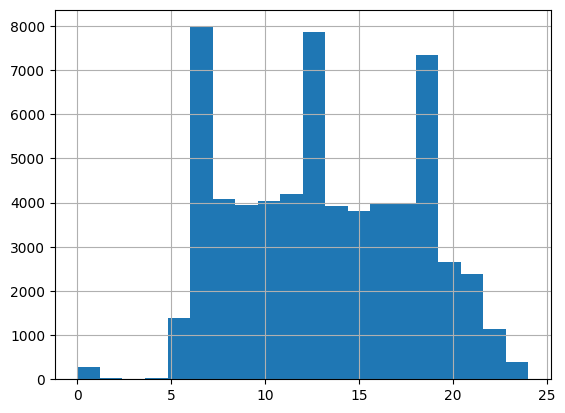

In [279]:
df['DepTime_Hour'].hist(bins=20)

<Axes: >

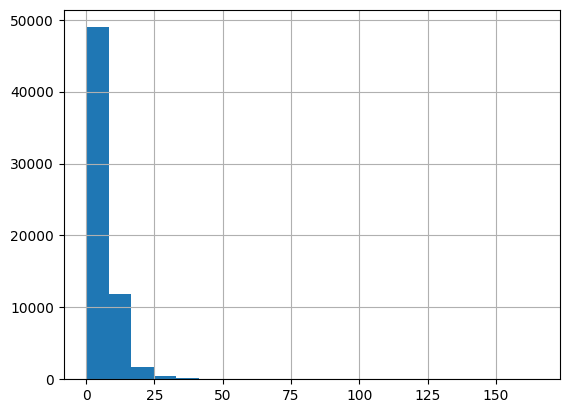

In [280]:
df['TaxiIn'].hist(bins=20)

In [11]:
df['FlightNum'].hist(bins=20)

NameError: name 'df' is not defined

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

ОТВЕТ: в графиках присутсвует проблема несогласованности параметров, это происходит из-за различия едениц измерения, что не позволяет сравнить все 3 графика. Маштабирование решает эту проблему

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [5]:
from sklearn.preprocessing import StandardScaler

In [10]:
def transform_data(data):
    number_columns = []
    str_columns = []

    columns = data.columns
    
    for column in columns:
        item_type = str(data[column].dtypes)
        if "int" in item_type or "float" in item_type:
            number_columns.append(column)
        else:
            str_columns.append(column)

    data[number_columns] = data[number_columns].fillna(0)
    data[str_columns] = data[str_columns].fillna("nan")
    
    scaler = StandardScaler()
    scaler.fit(data[number_columns])
    data[number_columns] = scaler.transform(data[number_columns])
    
    data = pd.get_dummies(data)
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [9]:
df

NameError: name 'df' is not defined

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [ ]:
# Your code here

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?